# Các mẫu thiết kế: Observer

**Bs. Lê Ngọc Khả Nhi**

# Giới thiệu

**Observer** là một mẫu thiết kế thuộc nhóm « Hành vi », nó cho phép tạo ra hành vi tương tác với nhau một cách linh động giữa các class, sự thay đổi trạng thái, hành vi của một class này dẫn đến sự thay đổi trên những class khác ở thời gian thực. 

Trong các giáo trình GOF Design patterns, mẫu thiết kế Observer thường được áp dụng cho mô hình quan hệ giữa nhà cung ứng dịch vụ và khách hàng thuê bao. Thí dụ : tòa soạn và độc giả, trang web bán hàng online và khách hàng, kênh truyền hình và người xem… 

Trong bài thực hành này, Nhi dùng một thí dụ khác gần gũi hơn với sự giao thoa giữa ngành Y khoa và lĩnh vực phân tích dữ liệu.

Theo sau sự thịnh hành của trào lưu Machine Learning ứng dụng trong y học, vài năm trở lại đây xuất hiện một số công ty khởi nghiệp nhắm đến đối tượng khách hàng là bác sĩ, bệnh viện. Dịch vụ được cung cấp là các mô hình hỗ trợ chẩn đoán tự động cho một số bệnh lý. Thí dụ một bác sĩ có thể thuê bao dịch vụ mô hình chẩn đoán bệnh tim mạch từ thông tin bệnh án cho phòng khám của mình và trả phí cho mỗi lượt bệnh nhân. Tuy nhiên, như ta biết không có một mô hình Machine learning nào là chính xác tuyệt đối hoặc đảm bảo mãi mãi chính xác qua thời gian, vì thế một nhu cầu mới lại phát sinh : khách hàng muốn theo dõi định kỳ hiệu năng của mô hình trên dữ liệu mới và báo động cho nhà cung cấp dịch vụ khi mô hình có dấu hiệu mất ổn định.

Trong thí dụ minh họa này, Nhi sẽ giả lập quy trình tương tác giữa khách hàng và nhà cung ứng trong một dịch vụ « bảo trì và kiểm tra mô hình định kỳ » như vậy. 

Giả định có 2 khách hàng là bác sĩ A và bác sĩ B thuê bao một mô hình có khả năng phát hiện bệnh nhân có nguy cơ bệnh lý tim mạch, dựa vào  giới tính, thông tin nhân trắc, huyết áp, tiêu thụ rượu bia/thuốc lá và xét nghiệm đường huyết, cholesterol. Định kỳ mỗi tháng 1 lần, nhà cung ứng dịch vụ sẽ kiểm định lại mô hình trên dữ liệu mới tổng hợp từ tất cả bệnh nhân của 2 bác sĩ A,B trong tháng, và gửi kết quả kiểm định là 2 chỉ số Ballanced accuray (BAC) và F1 score cho cả 2 khách hàng.  Bác sĩ A chỉ quan tâm đến F1 score, trong khi bác sĩ B chỉ quan tâm đến BAC, và họ sẽ gửi email phản hồi lại công ty để báo động khi kết quả của chỉ số mình quan tâm giảm thấp hơn ngưỡng = 0.7 ; 

Trong thí dụ này, giả định ta có 3 classes đại diện cho Service (dịch vụ kiểm tra mô hình), Client_A và Client_B (2 bác sĩ khách hàng) ; ta nhận ra 2 vấn đề : 

(1) Mối liên hệ tương tác giữa những class Client và class Service mang tính động, chúng chỉ tương tác với nhau tạm thời. Tại một thời điểm nào đó 1 khách hàng có thể hủy thuê bao dịch vụ, người này sẽ không còn trong danh sách nhận thông báo và cũng chấm dứt không tiếp tục gửi dữ liệu nữa. Đồng thời, có thể xuất hiện thêm những khách hàng mới (bác sĩ B,C,D…) đăng kí thuê bao và gia nhập vào quy trình kiểm tra định kì này ; 

(2) Sự thay đổi trạng thái bên trong class Service sẽ ảnh hưởng đến trạng thái và hành vi của mỗi class Client, và ngược lại : Dữ liệu bệnh nhân được cập nhật hằng tháng, kéo theo sự thay đổi của kết quả F1, BAC, và sự thay đổi này có thể kích hoạt phản hồi báo động hoặc không tùy theo mỗi Client.

Chú ý : các khách hàng cùng nhận được thông báo, nhưng độc lập với nhau, bác sĩ A không biết sự tồn tại của bác sĩ B, cũng không được phép nhìn vào dữ liệu bệnh nhân của Bác sĩ B và ngược lại.

Khi các bạn gặp loại vấn đề này trong chương trình, mẫu thiết kế Observer là giải pháp hiệu quả. 

# Triển khai

Cách thức triển khai :

1)	Phân tích cơ chế hoạt động của tiến trình, để nhận diện 2 bộ phận codes : phần lõi trung tâm (trong thí dụ này, class Service) vận hành độc lập về tính năng (quản lý, phân phối, nhiệm vụ trung tâm) nhưng có thể tương tác ngắn hạn, tạm thời với những đơn vị code ngoại vi (class Clients).

2)	Thiết kế giao thức (interface) cho Class Service, với tính năng quản lý danh sách khách hàng thuê bao (methods attach, detach) và tính năng thông báo kết quả cho những classes ngoại vi (method notify)

3)	Triển khai class Service từ giao thức I_Service, gồm: thuộc tính để lưu trạng thái (_state, Nhi dùng dictionary với 2 list cho F1 và BAC), thuộc tính danh sách khách hàng (_clients : Nhi dùng Set để mỗi khách hàng chỉ xuất hiện 1 tài khoản). Lưu ý : trong thí dụ của Nhi, có thêm thuộc tính _newdata là 1 Dict để nhận dữ liệu cập nhật (dataframe X, Y) từ khách hàng). 

4)	Triển khai nội dung những methods attach, detach để thực thi hoạt động quản lý danh sách khách hàng (nhận thuê bao mới, hủy đăng kí dịch vụ) và method notify để thông báo cho toàn bộ thuê bao trong danh sách (sử dụng 1 vòng lặp). Ngoài ra, trong thí dụ này Nhi thêm 1 method nữa cho phép vẽ biểu đồ theo dõi diễn tiến của kết quả F1, BAC trong suốt quá trình vận hành

5)	Thiết kế giao thức Interface Client, với 2 abstract methods là data_transfter (gửi dữ liệu mới về dịch vụ) và update (nhận kết quả cập nhật từ dịch vụ). 

6)	Triển khai giao thức IClient để tạo ra những concrete class cho mỗi Client, thí dụ Client_A, Client_B, trong đó ta tùy biến hành vi của method update, thí dụ Client_A chỉ phản hồi khi F1 < 0.7, còn Client_B chỉ báo động khi BAC < 0.7

Sơ đồ UML của hệ thống như sau:

!['uml'](observer_uml.png)


# Cấu trúc module

Trong thư mục Observer tại github của Nhi: https://github.com/kinokoberuji/Python-snipets/tree/master/GOF/Observer

Có 4 files gồm:

1) cardio_train.csv là dữ liệu cho bài toán chẩn đoán bệnh tim mạch, 1 phần dữ liệu sẽ được dùng để sinh ngẫu nhiên những tập dữ liệu kiểm tra định kì mô hình.

2) Mô hình XGboost có tên là CVD_mod, giả định là mô hình mà dịch vụ nêu trên cung ứng cho khách hàng

3) observer_demo.py là 1 module Python, bên trong chứa code để tải dữ liệu, mô hình và triển khai mẫu thiết kế Observer

Nhi import module observer_demo này

In [1]:
from observer_demo import *

xgb_mod là 1 mô hình Xgboost:

In [2]:
xgb_mod

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=16,
              num_parallel_tree=1, predictor='gpu_predictor', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

Service là giao thức (interface) cho class ConcreteService thực sự:

In [ ]:
class Service(ABC):

    @abstractmethod
    def attach(self, client: Client) -> None:
        """
        Thêm thuê bao mới vào danh sách
        """
        pass

    @abstractmethod
    def detach(self, client: Client) -> None:
        """
        Xóa bỏ thuê bao khỏi danh sách
        """
        pass

    @abstractmethod
    def notify(self) -> None:
        """
        Thông báo cho khách hàng về kết quả kiểm tra mô hình
        """
        pass

    @abstractmethod
    def visualize_states(self) -> None:
        """Xem lịch sử kết quả kiểm tra mô hình trên biểu đồ
        """
        pass

Class ConcreteService triển khai class Service

In [ ]:
class ConcreteService(Service):
    """
    Class Service
    """
    
    _newdata = {'X': pd.DataFrame(), 'y': pd.DataFrame()}
    _state = {'f1': [], 'bac': []}

    _clients: Set(Client) = set()

    def attach(self, client: Client) -> None:
        print(style.GREEN + f"Khách hàng mới {client._name} thuê bao dịch vụ")
        self._clients.add(client)

    def detach(self, client: Client) -> None:
        print(style.GREEN + f"Khách hàng {client._name} chấm dứt sử dụng dịch vụ")
        self._clients.remove(client)


    def notify(self) -> None:
        """
        Cập nhật thay đổi đến từng khách hàng
        """
        print(style.BLACK + "Cập nhật kết quả kiểm định cho tất cả khách hàng ...")
        print(style.GREEN + pd.DataFrame(self._state).iloc[[-1]].to_string(index=False))

        for client in self._clients:
            client.update(self)
        
        self._newdata = {'X': pd.DataFrame(), 'y': pd.DataFrame()}

    def model_following_up(self, xgb_mod: XGBClassifier) -> None:
        """
        Code thi hành quy trình kiểm tra mô hình
        """

        temp_X = self._newdata['X']
        temp_y = self._newdata['y']

        pred = xgb_mod.predict(temp_X)
        bac = balanced_accuracy_score(temp_y, pred)
        f1 = f1_score(temp_y, pred)
        self._state['f1'].append(f1)
        self._state['bac'].append(bac)

        print(style.BLACK + f"Mô hình đang được kiểm tra định kì trên {len(temp_X)} bệnh nhân mới ...")

        self.notify()
    
    def visualize_states(self) -> None:
        plt.plot(self._state['f1'], '-r', alpha = 0.7, label = 'F1')
        plt.plot(self._state['bac'], '-b', alpha = 0.5, label = 'BAC')
        plt.hlines(y = 0.7, xmin = 1, xmax = len(self._state['f1']),linestyles='dashed')
        plt.legend()
        plt.xlabel('Lượt kiểm định')
        plt.ylabel('Hiệu năng')
        plt.show()

class Client là giao thức cho những class ConcreteClient_A và ConcreteClient_B

In [ ]:
class Client(ABC):
    """
    Khách hàng
    """
    @abstractmethod
    def data_transfer(self, service: Service) -> None:
        """Gửi dữ liệu mới về dịch vụ
        """
        pass

    @abstractmethod
    def update(self, service: Service) -> None:
        """
        Nhận kết quả kiểm tra từ dịch vụ
        """
        pass

class ConcreteClient_A và ConcreteClient_B đại diện cho 2 khách hàng trong hệ thống. Chú ý sự khác biệt về hành vi của 2 method update. method data_transfer như nhau cho mỗi class.

In [ ]:
class ConcreteClientA(Client):

    _name = 'A'

    def data_transfer(self, service: Service) -> None:
        print(style.BLUE + f"Khách hàng A cập nhật dữ liệu mới cho dịch vụ ...")
        spl_idx = np.random.choice(X_test.index, np.random.choice(range(50,81)))
        temp_y = y_test.loc[spl_idx]
        temp_X = X_test.loc[spl_idx]

        temp_X.loc[:,['age','height','weight','ap_hi','ap_lo']] = \
            temp_X[['age','height','weight','ap_hi','ap_lo']].apply(lambda x: add_noise(x))

        service._newdata['X'] = pd.concat([service._newdata['X'], temp_X])
        service._newdata['y'] = pd.concat([service._newdata['y'], temp_y])

    def update(self, service: Service) -> None:
        if service._state['f1'][-1] < 0.7:
            print(style.BLUE + f"Khách hàng A: báo động xuất hiện F1 = {service._state['f1'][-1]}")
        else:
            print(style.BLUE + 'Khách hàng A: F1 của mô hình ổn định')

In [ ]:
class ConcreteClientB(Client):

    _name = 'B'

    def data_transfer(self, service: Service) -> None:
        print(style.RED + f"Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...")
        spl_idx = np.random.choice(X_test.index,np.random.choice(range(50,81)))
        temp_y = y_test.loc[spl_idx]
        temp_X = X_test.loc[spl_idx]

        temp_X.loc[:,['age','height','weight','ap_hi','ap_lo']] = \
            temp_X[['age','height','weight','ap_hi','ap_lo']].apply(lambda x: add_noise(x))

        service._newdata['X'] = pd.concat([service._newdata['X'], temp_X])
        service._newdata['y'] = pd.concat([service._newdata['y'], temp_y])

    def update(self, service: Service) -> None:
        if service._state['bac'][-1] < 0.7:
            print(style.RED +f"Khách hàng B: báo động xuất hiện BAC = {service._state['bac'][-1]}")
        else:
            print(style.RED + 'Khách hàng B: BAC của mô hình ổn định')

# Vận hành hệ thống

Đầu tiên, Nhi khởi tạo object service là instance của class ConcreteService, sau đó tạo 2 object observer_a và observer_b tương ứng của 2 classes ConcreteClientA và ConcreteClientB.

Như vậy ta đã có 1 dịch vụ, và 2 khách hàng

Tiếp theo, Nhi dùng method attach để cho 2 khách hàng này đăng kí thuê bao dịch vụ service, tên 2 khách hàng lập tức được lưu vào danh sách cung ứng dịch vụ.

In [3]:
service = ConcreteService()
observer_a = ConcreteClientA()
observer_b = ConcreteClientB()

service.attach(observer_a)
service.attach(observer_b)

service._clients

Khách hàng mới A thuê bao dịch vụ
Khách hàng mới B thuê bao dịch vụ


{<observer_demo.ConcreteClientA at 0x2681f95c850>,
 <observer_demo.ConcreteClientB at 0x2681f95c430>}

In [4]:
for c in service._clients:
    print(c._name)

B
A


Ở thời điểm này, trạng thái của service là rỗng vì chưa nhận dữ liệu và chưa kiểm định mô hình lần nào:

In [5]:
service._state

{'f1': [], 'bac': []}

Giả sử ta kiểm tra định kì 30 tuần liên tiếp, mỗi tuần bác sĩ A và B gửi dữ liệu mới về dịch vụ và nhận được kết quả kiểm tra, tùy theo kết quả tốt hay xấu, mỗi bác sĩ sẽ phản hồi là mô hình ổn định hay báo động F1 hay BAC giảm 

In [5]:
i = 0
while i < 30:
    print(style.BLACK + f'Kiểm tra định kì tuần thứ {i+1}')
    print(style.BLACK + '-'*50)
    observer_a.data_transfer(service)
    observer_b.data_transfer(service)

    service.model_following_up(xgb_mod)
    print(style.BLACK + '-'*50)
    i += 1

Kiểm tra định kì tuần thứ 1
--------------------------------------------------
Khách hàng A cập nhật dữ liệu mới cho dịch vụ ...
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 114 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
  f1      bac
0.68 0.714815
Khách hàng B: BAC của mô hình ổn định
Khách hàng A: báo động xuất hiện F1 = 0.68
--------------------------------------------------
Kiểm tra định kì tuần thứ 2
--------------------------------------------------
Khách hàng A cập nhật dữ liệu mới cho dịch vụ ...
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 131 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
      f1      bac
0.684211 0.719672
Khách hàng B: BAC của mô hình ổn định
Khách hàng A: báo động xuất hiện F1 = 0.6842105263157895
--------------------------------------------------
Kiểm tra định kì tuần thứ 3
------------------------------------------

Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 106 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
      f1      bac
0.659091 0.707468
Khách hàng B: BAC của mô hình ổn định
Khách hàng A: báo động xuất hiện F1 = 0.6590909090909091
--------------------------------------------------
Kiểm tra định kì tuần thứ 19
--------------------------------------------------
Khách hàng A cập nhật dữ liệu mới cho dịch vụ ...
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 139 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
      f1      bac
0.677966 0.718685
Khách hàng B: BAC của mô hình ổn định
Khách hàng A: báo động xuất hiện F1 = 0.6779661016949152
--------------------------------------------------
Kiểm tra định kì tuần thứ 20
--------------------------------------------------
Khách hàng A cập nhật dữ liệu mới cho dịch vụ ...
Khách hàng B cập nhật dữ liệu mới cho dịch vụ 

Giả định là sau 30 tuần, bác sĩ A không còn hài lòng về dịch vụ nữa và hủy thuê bao:

In [6]:
service.detach(observer_a)

Khách hàng A chấm dứt sử dụng dịch vụ


Lúc này trong danh sách của service chỉ còn lại khách hàng B

In [7]:
service._clients

{<observer_demo.ConcreteClientB at 0x2681f95c430>}

Khách hàng B tiếp tục gửi dữ liệu hàng tuần trong 30 tuần tiếp theo và quy trình cập nhật, phản hồi tiếp tục diễn ra:

In [9]:
i = 29
while i < 60:
    print(style.BLACK + f'Kiểm tra định kì tuần thứ {i+1}')
    print(style.BLACK + '-'*50)
    observer_b.data_transfer(service)

    service.model_following_up(xgb_mod)
    print(style.BLACK + '-'*50)
    i += 1

Kiểm tra định kì tuần thứ 30
--------------------------------------------------
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 52 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
  f1      bac
0.75 0.796875
Khách hàng B: BAC của mô hình ổn định
--------------------------------------------------
Kiểm tra định kì tuần thứ 31
--------------------------------------------------
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 51 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
      f1      bac
0.666667 0.742742
Khách hàng B: BAC của mô hình ổn định
--------------------------------------------------
Kiểm tra định kì tuần thứ 32
--------------------------------------------------
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 63 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
     f1      bac
0.73913 0

Mô hình đang được kiểm tra định kì trên 61 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
  f1      bac
0.72 0.760823
Khách hàng B: BAC của mô hình ổn định
--------------------------------------------------
Kiểm tra định kì tuần thứ 60
--------------------------------------------------
Khách hàng B cập nhật dữ liệu mới cho dịch vụ ...
Mô hình đang được kiểm tra định kì trên 80 bệnh nhân mới ...
Cập nhật kết quả kiểm định cho tất cả khách hàng ...
      f1      bac
0.611111 0.652908
Khách hàng B: báo động xuất hiện BAC = 0.6529080675422139
--------------------------------------------------


Ta có thể xem lại toàn bộ nhật ký 60 tuần hoạt động của dịch vụ bằng method visualize_states():

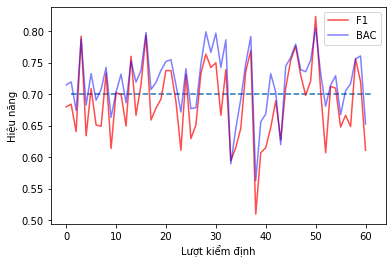

In [11]:
service.visualize_states()

# Nhận xét

Ưu và nhược điểm của mẫu thiết kế Observer: 

Thỏa tiêu chí Open/Close trong bộ nguyên tắc SOLID của Robert C. Martin (Uncle Bob): chương trình của chúng ta có khả năng mở rộng, vì cho phép mở rộng (thêm khách hàng mới, thay đổi hành vi của mỗi khách hàng), nhưng Đóng với sự thay đổi nội dung code (thí dụ nội dung class Service là bất biến), hay ngược lại : Thay đổi nội dung code trong class Service, thậm chí huấn luyện lại mô hình mới, độc lập với code trong những class Clients.
Cho phép những object tương tác với nhau một cách linh động, ngắn hạn và tạm thời trong giai đoạn thi hành, ở thời gian thực.

Nhược điểm : Những concrete class client và object phải được tạo ra một cách rời rạc và không được Service đối xử theo thứ tự ưu tiên nào cả.


# Tổng kết

Observer là một mẫu thiết kế khá đơn giản nhưng rất mạnh và tiện dụng, nó lại rất phổ biến trong giới lập trình vì cho phép giải quyết nhiều vấn đề thực tiễn trong cuộc sống, như thiết kế hệ thống quản lý/tương tác giữa nhà cung ứng và khách hàng, mô hình đăng ký thuê bao, quảng cáo, giao diện tương tác tùy biến, … 